# Visualizing Earning Based On College Majors

In [20]:
import numpy as np
import pandas as pd

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [23]:
recent_grads = pd.read_csv("recent-grads.csv")

* Data cleaning and basic analysis

In [24]:
recent_grads.iloc[[0]]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [25]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [26]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [27]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [28]:
raw_data_count = recent_grads.shape[0]

In [29]:
recent_grads.dropna(axis=0, inplace=True)

In [30]:
cleaned_data_count = recent_grads.shape[0]

In [31]:
cleaned_data_count

172

In [32]:
raw_data_count

173

Droped the empty rows as they will cause problems while making visualizations.

## Visualizations

In [33]:
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### Scatter Plots

Text(0.5, 1.0, 'Median Salary vs Sample Size')

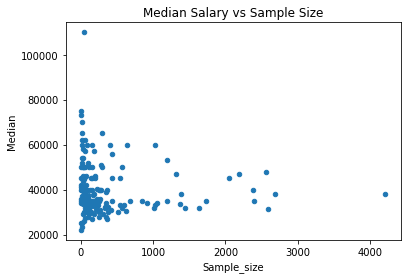

In [34]:
ax1 = recent_grads.plot(kind='scatter', x='Sample_size', y='Median')
ax1.set_title('Median Salary vs Sample Size')

Text(0.5, 1.0, 'Sample Size and Unemployment Rate')

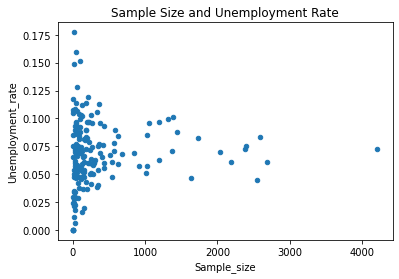

In [35]:
ax2 = recent_grads.plot(kind='scatter', x='Sample_size', y='Unemployment_rate')
ax2.set_title('Sample Size and Unemployment Rate')

Text(0.5, 1.0, 'Full Time vs Median')

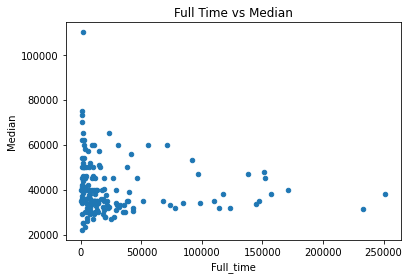

In [36]:
ax3 = recent_grads.plot(kind='scatter', x='Full_time', y='Median')
ax3.set_title('Full Time vs Median')

Text(0.5, 1.0, 'Share of Women vs Unemployment Rate')

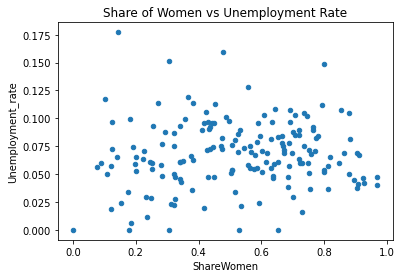

In [37]:
ax4 = recent_grads.plot(kind='scatter', x='ShareWomen', y='Unemployment_rate')
ax4.set_title('Share of Women vs Unemployment Rate')

Text(0.5, 1.0, 'Men vs Median')

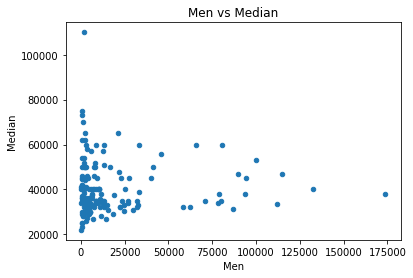

In [38]:
ax5 = recent_grads.plot(kind='scatter', x='Men', y='Median')
ax5.set_title('Men vs Median')

(-10000.0, 120000.0)

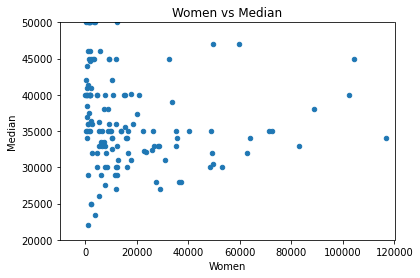

In [39]:
ax5 = recent_grads.plot(kind='scatter', x='Women', y='Median')
ax5.set_title('Women vs Median')
ax5.set_ylim(20000, 50000)
ax5.set_xlim(-10000, 120000)

Text(0.5, 1.0, 'Total vs Median')

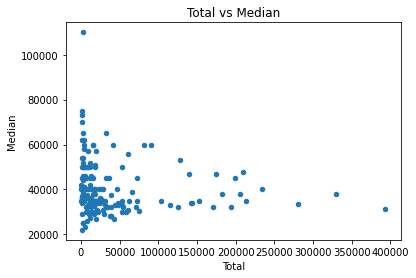

In [40]:
ax6 = recent_grads.plot(kind='scatter', x='Total', y='Median')
ax6.set_title('Total vs Median')

Text(0.5, 1.0, 'Share of Women vs Median')

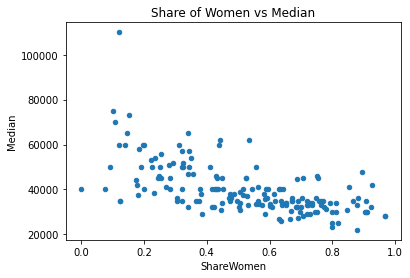

In [19]:
ax7 = recent_grads.plot(kind='scatter', x='ShareWomen', y='Median')
ax7.set_title('Share of Women vs Median')

### Do students in more popular majors make more money?  
* **NO**, there no correlation between the popularity of a major and median salary.

### Do students that majored in subjects that were majority female make more money?  
* **NO**, instead a **weak inverse correlation** was seen between Median Salary and Share of Women.

### Is there any link between the number of full-time employees and median salary?
* **NO**, there is no relation between Full-time employees and Median Salary.

### Histograms

Text(0, 0.5, 'Frequency')

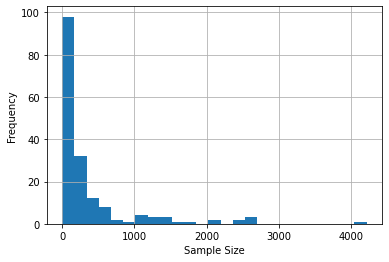

In [10]:
ax = recent_grads['Sample_size'].hist(bins=25)
ax.set_xlabel('Sample Size')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

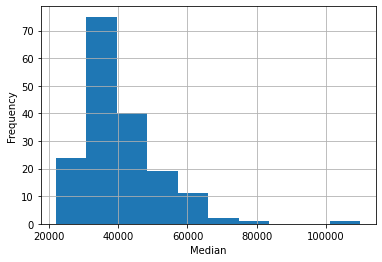

In [11]:
ax = recent_grads['Median'].hist()
ax.set_xlabel("Median")
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

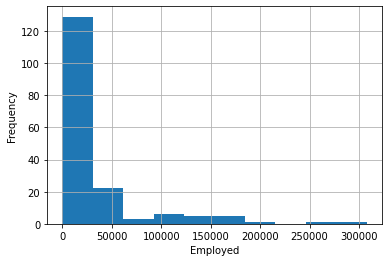

In [12]:
ax = recent_grads['Employed'].hist()
ax.set_xlabel("Employed")
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

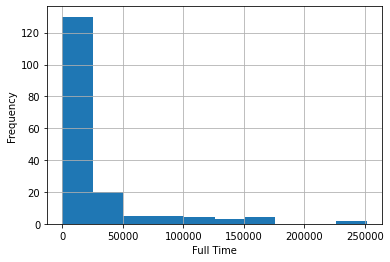

In [13]:
ax = recent_grads['Full_time'].hist()
ax.set_xlabel("Full Time")
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

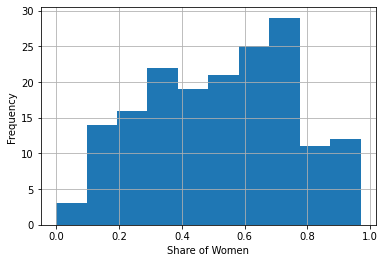

In [14]:
ax = recent_grads['ShareWomen'].hist()
ax.set_xlabel("Share of Women")
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

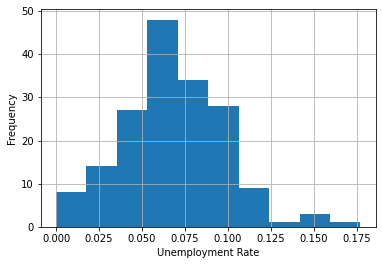

In [16]:
ax = recent_grads['Unemployment_rate'].hist()
ax.set_xlabel("Unemployment Rate")
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

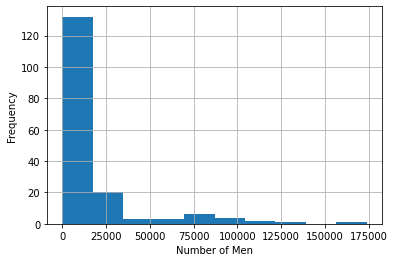

In [17]:
ax = recent_grads['Men'].hist()
ax.set_xlabel("Number of Men")
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

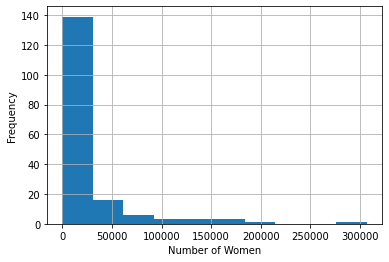

In [18]:
ax = recent_grads['Women'].hist()
ax.set_xlabel("Number of Women")
ax.set_ylabel('Frequency')

### Scatter Matrix Plot

In [6]:
from pandas.plotting import scatter_matrix

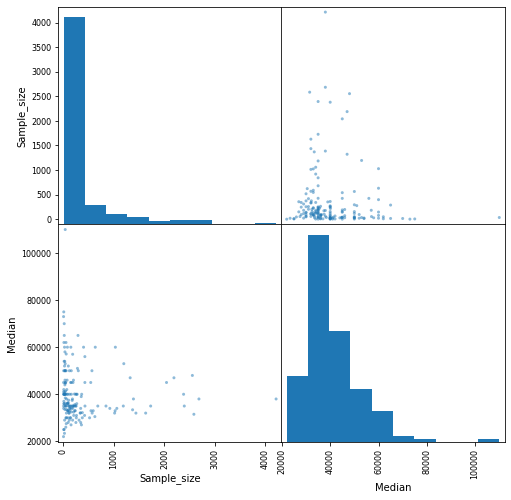

In [8]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(8, 8))
plt.show()

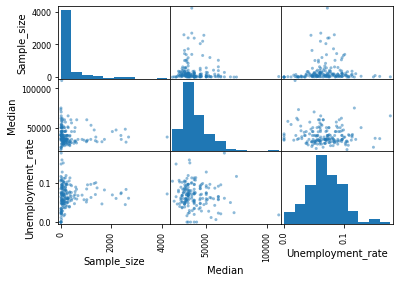

In [9]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']])
plt.show()

### Bar Plots

In [50]:
df1 = recent_grads.iloc[:5]

In [51]:
df2 = recent_grads.iloc[-5:]

In [62]:
bar_data1 = pd.concat([df1, df2], ignore_index=False)

In [63]:
bar_data1

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


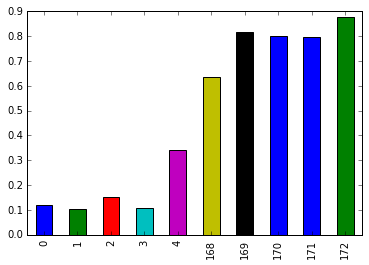

In [73]:
bar_data1['ShareWomen'].plot(kind='bar')

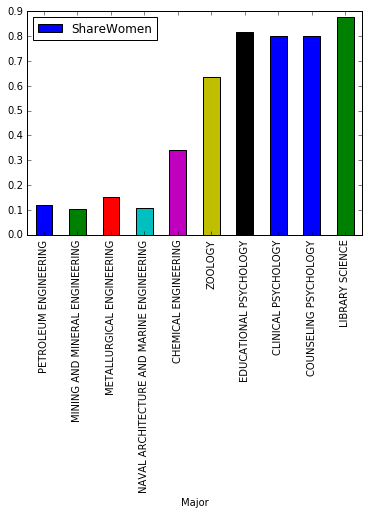

In [74]:
bar_data1.plot.bar(x='Major', y='ShareWomen')

In [65]:
df1 = recent_grads.iloc[:5]

In [66]:
df2 = recent_grads.iloc[-5:]

In [67]:
bar_data2 = pd.concat([df1, df2], ignore_index=False)

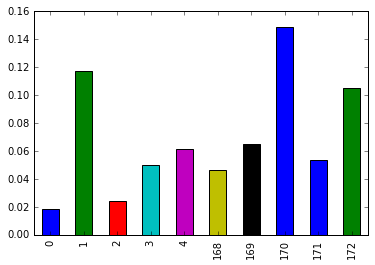

In [68]:
bar_data2['Unemployment_rate'].plot(kind='bar')

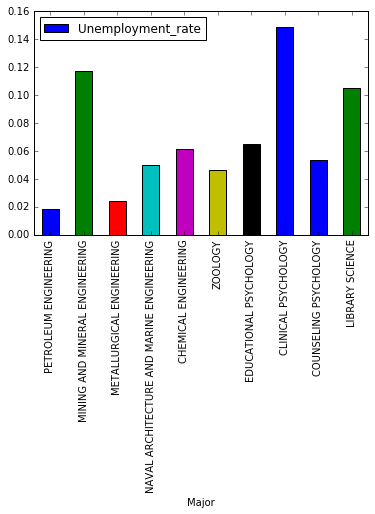

In [75]:
bar_data2.plot.bar(x='Major', y='Unemployment_rate')

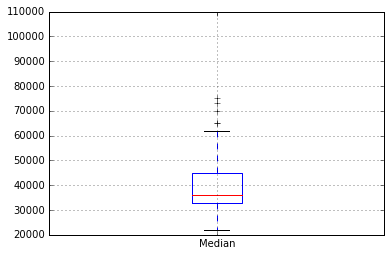

In [76]:
recent_grads.boxplot(column='Median')

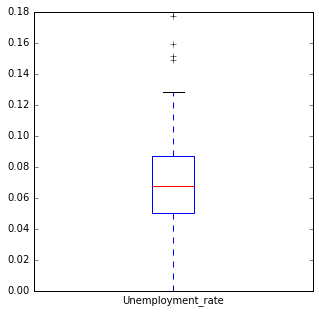

In [82]:
recent_grads['Unemployment_rate'].plot(kind='box', figsize=(5, 5))

(-1000, 3000)

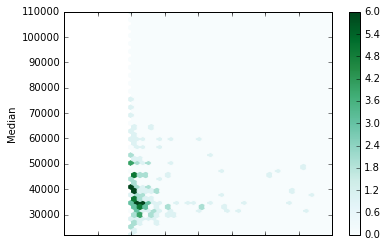

In [90]:
ax = recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=50)
ax.set_xlim(-1000, 3000)